In [1]:
#importando pacotes
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)

#pre processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler



In [2]:
#importando a base
df = pd.read_csv("F:/4intelligence/case_2/dados/UCI_Credit_Card.csv")


# Limpeza básica

Nesse passo iremos ter um primeio panorama do datase, checar por dados ausentes, colunas duplicadas e possíveis erros de digitação.

In [3]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape


(30000, 25)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.duplicated().sum()


0

In [7]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<Axes: >

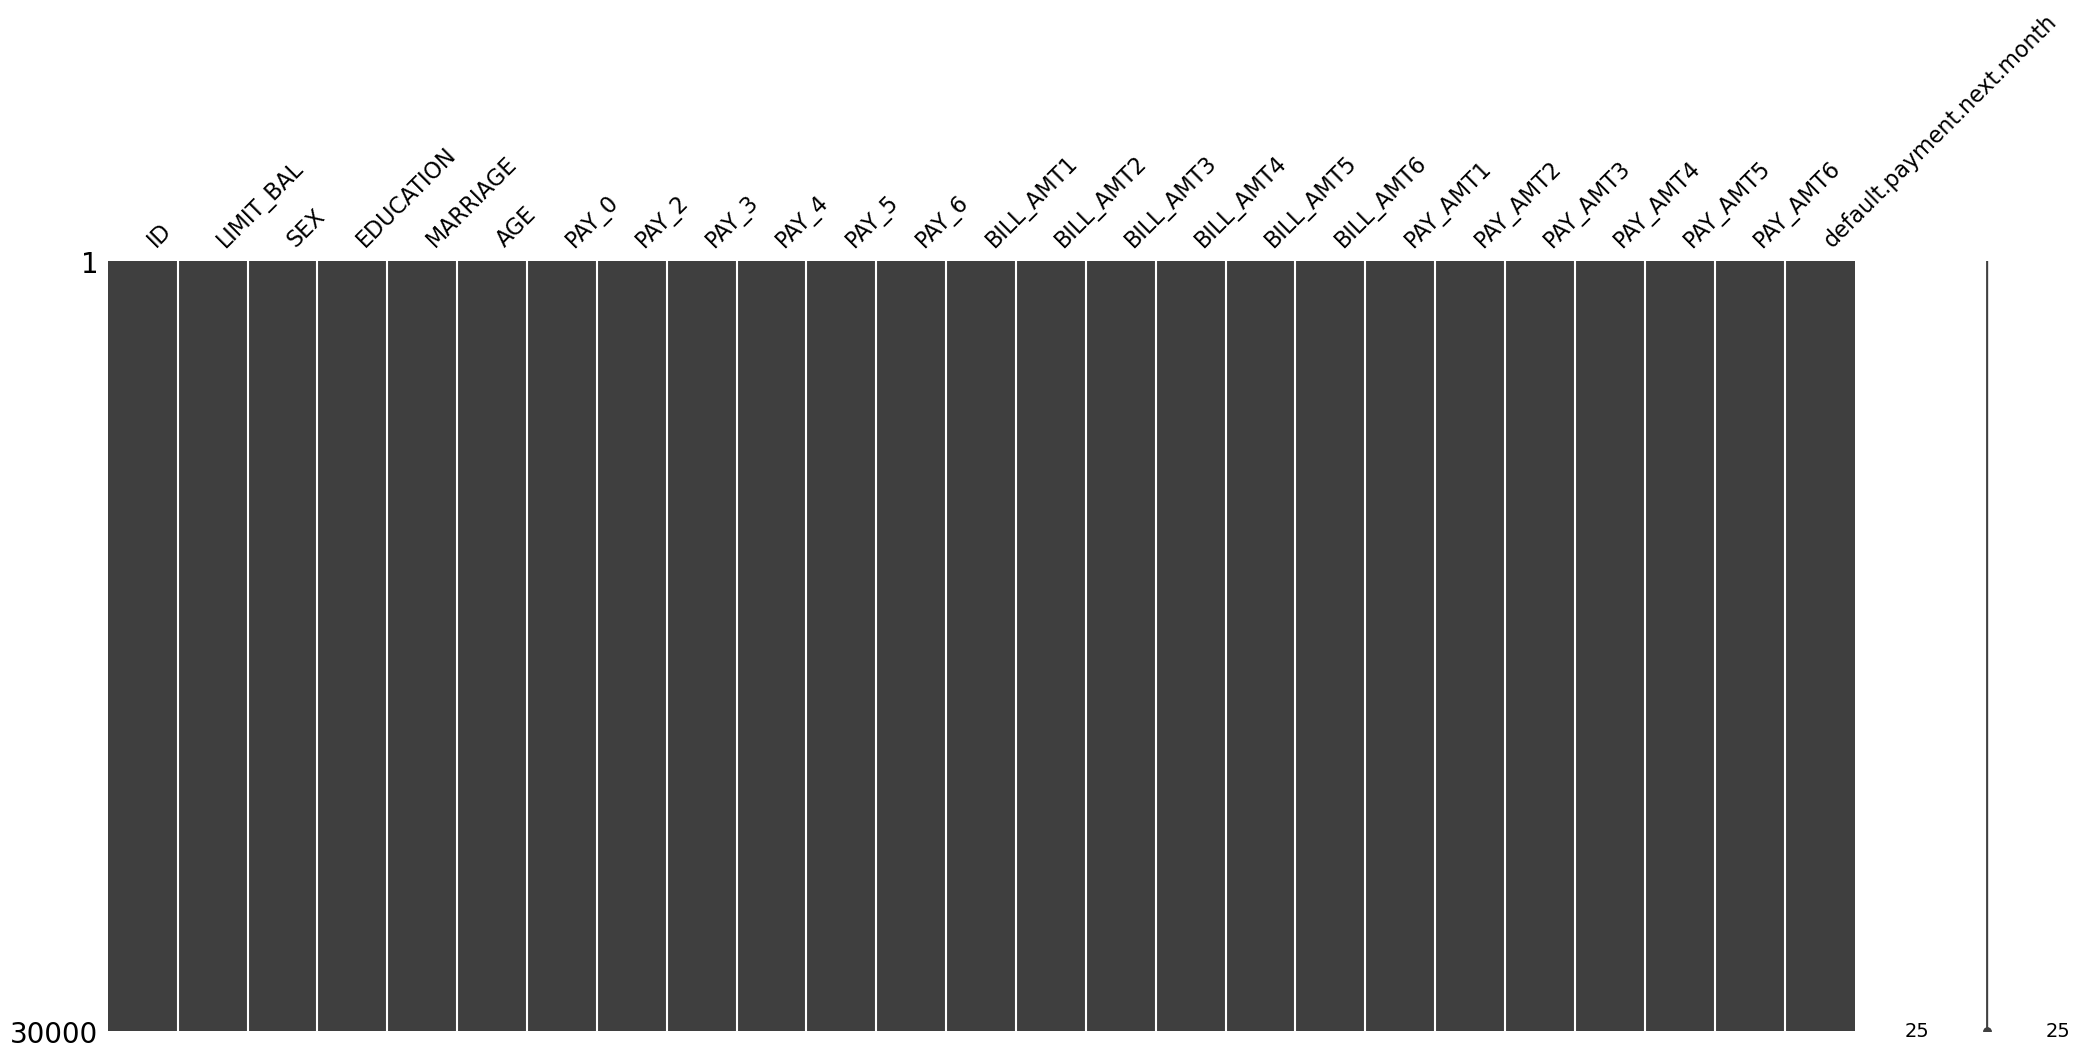

In [8]:
msno.matrix(df)


Em um primeiro momento, não parece haver dados duplicados ou problemas com dados ausentes.


In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Pela tabela de descrição, é possível perceber alguns valores estranhos no dataset:

- As variáveis categóricas contém valores não listados no dicionário. `EDUCATION` e `MARRIAGE` tem valores mínimos de 0, entretanto a ordem númerica no dicionário inicia por 1.
- `PAY_0` e variantes também contém mínimo de -2, embora o dicionário inicia-se com -1 e não tenha valores registrados dentro do rótulo -2.
- `BILL_AMT1` e variantes tem valores negativos como mínimo. Isso poderia ser interpretado como dívidas? Não está claro e deve ser investigado.


# Análise exploratória de dados

Tendo um panorama inicial do dataset nas etapas anteriores, podemos entender melhor como o dataset se comporta ao fazermos um estudo mais detalhado.
Nessa etapa, verificamos através da análise gráfica a distribuição das variáveis categóricas e quantitativas e se há valores discrepantes. Além disso, observammos como nossa variável de interesse [`default.payment.next.month`] se comporta. Faremos uma análise univariada e uma bivariada.

## Outliers

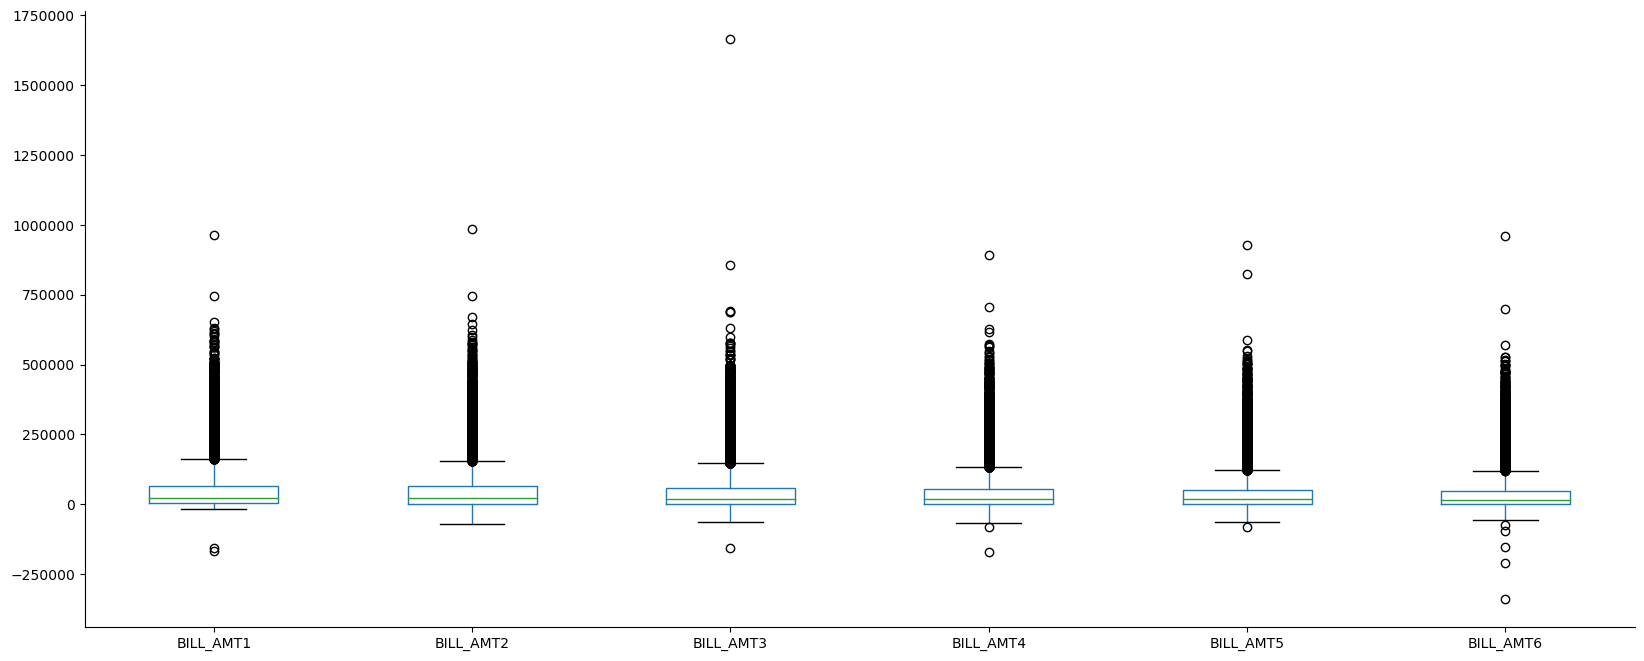

In [11]:
df.boxplot(column=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], grid= False, figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


- Há alguns valores de outliers, principalmente na variável `BILL_AMT3`, onde podemos ver que o valor máximo da distribuição é um outlier.

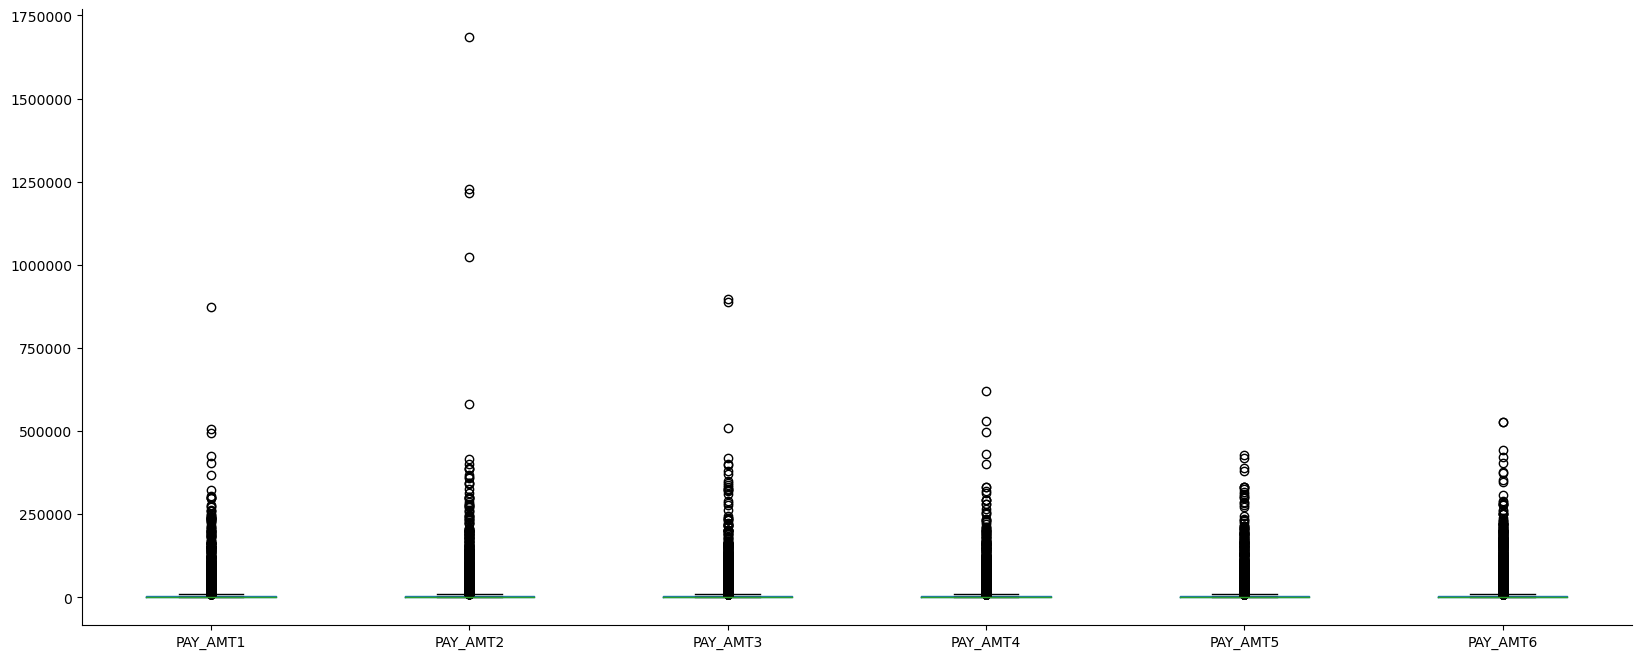

In [12]:
df.boxplot(column=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], grid= False, figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

- Também há outliers, principalmente quando há valores acima de 75000.

## Variável target: default



In [13]:
# Funções de configuraçãos dos gráficos

def configure_barh_chart(chart, title):
    # Configura o título do gráfico
    plt.title(title, size=16, weight='bold', alpha=0.8)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tick_params(bottom = False, left = False)

    # Configura os rótulos nas barras (caso seja um gráfico de barras)
    if isinstance(chart, plt.Axes):
        rects = chart.patches
        for rect in rects:
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2
            space = -60
            ha = 'left'
            if x_value < 0:
                space *= -1
                ha = 'right'
            label = "{:.0f}".format(x_value)

            plt.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords="offset points",
                va='center',
                ha=ha,
                color='white',
                weight='bold',
                size=14)

    # Exibe o gráfico
    plt.show()


# gráfico barras horizontal
def configure_bar_chart(chart, title, legend=True):
    # Configura o título do gráfico
    plt.title(title, size=14, alpha=0.8, weight='bold', pad=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tick_params(bottom=False, left=False)
    plt.yticks([])
    
    # Adiciona a legenda se o argumento legend for True
    if legend:
        plt.legend(loc='upper right', frameon=False, fontsize=10)

    # Configura rótulos nas barras
    if isinstance(chart, plt.Axes):
        for rect in chart.patches:
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2

            space = 1.5
            va = 'bottom'

            if y_value < 0:
                space *= 1
                va = 'top'

            label = "{:.0f}".format(y_value)
            chart.annotate(
                label,
                (x_value, y_value),
                xytext=(0, space),
                textcoords="offset points",
                ha='center',
                va=va,
                color='black',
                size=12,
                weight='bold')

    # Exibe o gráfico
    plt.show()

#histograma com kde
def plot_histogram_kde(data, title, xlabel, ylabel, color):
    with plt.style.context('ggplot'):
        plt.figure(figsize=(10, 6))
        sns.histplot(data, kde=True, color=color)
        plt.ticklabel_format(style='plain', axis='x')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(False)
        plt.show()


Renomeei a coluna `default.payment.next.month` para `is_default`.

In [14]:
df = df.rename(columns = {'default.payment.next.month': 'is_default'})

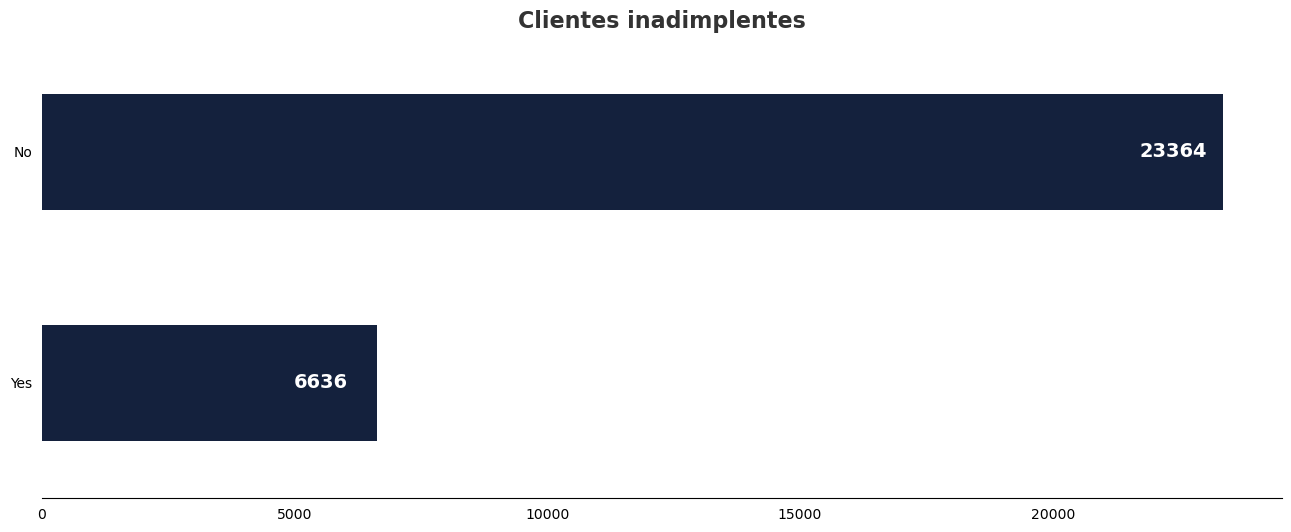

In [15]:
# Mapeia os rótulos desejados para os valores binários
label_mapping_default = {0: 'No', 1: 'Yes'}
#Gráfico
default_grph = (df['is_default'].map(label_mapping_default).value_counts()
                .sort_values(ascending=True)
                .plot(kind='barh', color='#14213d', xlabel='',figsize=(16, 6), align='center',  grid= False))
configure_barh_chart(default_grph, 'Clientes inadimplentes') 


- Há mais clientes que pagaram o cartão de crédito do que aqueles que não, vemos que temos classes desbalanceadas. Será necessário utilizar técnincas de resampling.

In [16]:
print(f'A probabilidade de inadimplência é: {df.is_default.sum() / len(df.is_default)}')


A probabilidade de inadimplência é: 0.2212


## Variáveis categóricas

Vamos olhar a distribuição das variáveis categóricas. Temos como variáveis categóricas 

- SEX
- EDUCATION
- MARRIAGE

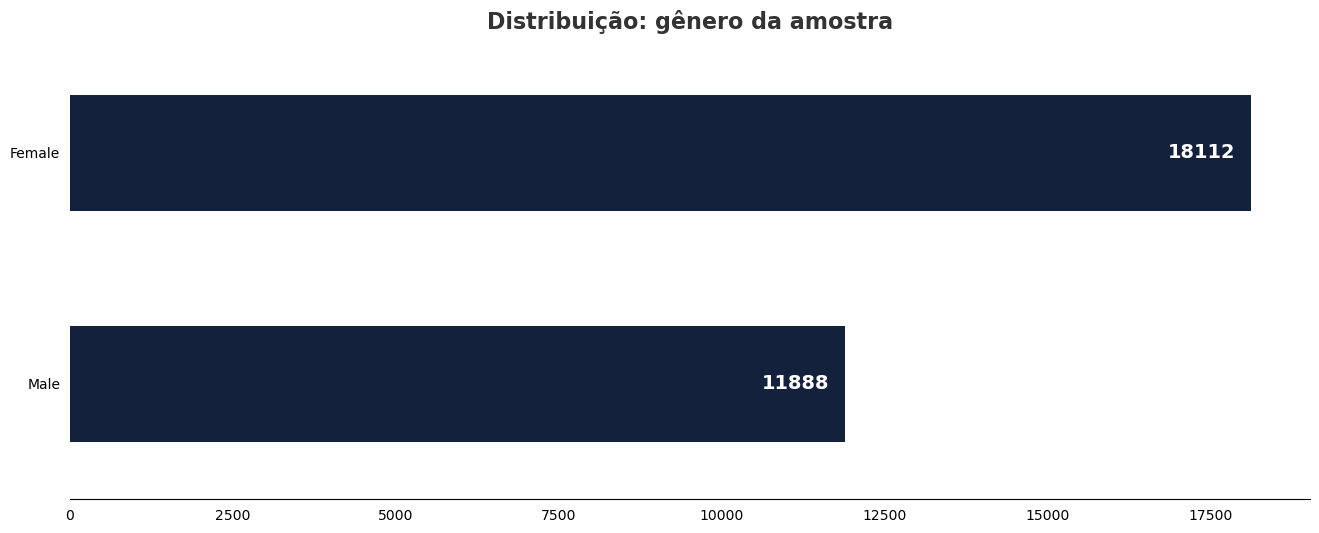

In [17]:
label_mapping_sex = {1: 'Male', 2: 'Female'}
sex_grph = (df['SEX'].map(label_mapping_sex).value_counts()
                .sort_values(ascending=True)
                .plot(kind='barh', color='#14213d', xlabel='',figsize=(16, 6), align='center',  grid= False))
configure_barh_chart(sex_grph, 'Distribuição: gênero da amostra')

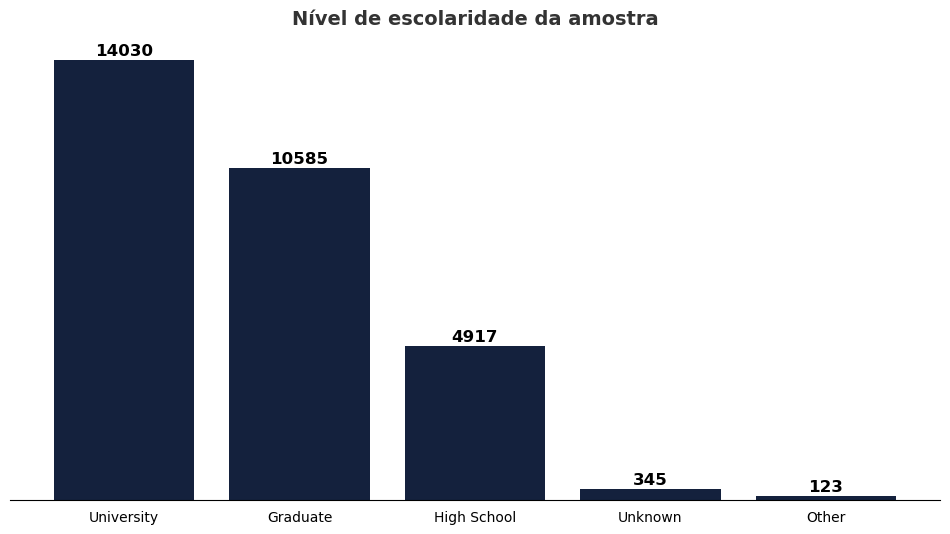

In [18]:
label_mapping_educ = {1: 'Graduate', 2: 'University', 3: 'High School', 0: 'Unknown', 4: 'Other', 5: 'Unknown', 6: 'Unknown'}
education_gph = (df['EDUCATION'].map(label_mapping_educ).value_counts()
                                .plot(kind= 'bar', rot= 0, color='#14213d', grid= False, width = 0.8, figsize=(12, 6)))
configure_bar_chart(education_gph,'Nível de escolaridade da amostra', legend = False)



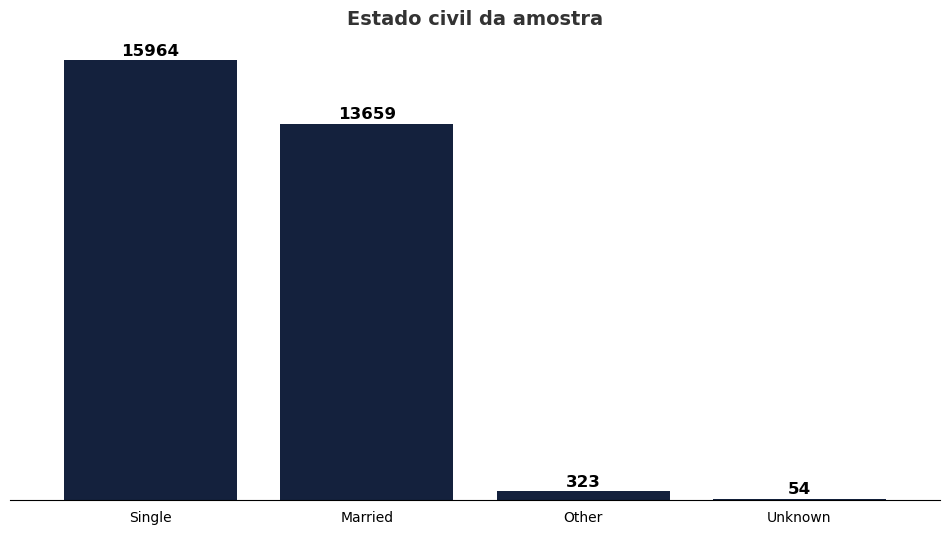

In [19]:
label_mapping_marriage = {0: 'Unknown', 1: 'Married', 2: 'Single', 3: 'Other'}
marriage_gph = (df['MARRIAGE'].map(label_mapping_marriage).value_counts()
                                .plot(kind= 'bar', rot= 0, color='#14213d', grid= False, width = 0.8, figsize=(12, 6)))
configure_bar_chart(marriage_gph,'Estado civil da amostra', legend = False)

Temos alguns "Unkown"s para corrigir, feita a análise da distribuição das variáveis categóricas univariada, vemos a bivariada em relação à inadimplência:

In [20]:
#criando as crosstabs para os plots

# Criando tabelas de contingência
sex_crstab = pd.crosstab(df['SEX'].map(label_mapping_sex), df['is_default'].map(label_mapping_default))
educ_crstab = pd.crosstab(df['EDUCATION'].map(label_mapping_educ), df['is_default'].map(label_mapping_default))
marriage_crstab = pd.crosstab(df['MARRIAGE'].map(label_mapping_marriage), df['is_default'].map(label_mapping_default))

print('Gênero crosstab')
print(sex_crstab)
print('-' * 25)
print('Educação crosstab')
print(educ_crstab)
print('-' * 25)
print('Estado Civil crosstab')
print(marriage_crstab)

Gênero crosstab
is_default     No   Yes
SEX                    
Female      14349  3763
Male         9015  2873
-------------------------
Educação crosstab
is_default      No   Yes
EDUCATION               
Graduate      8549  2036
High School   3680  1237
Other          116     7
University   10700  3330
Unknown        319    26
-------------------------
Estado Civil crosstab
is_default     No   Yes
MARRIAGE               
Married     10453  3206
Other         239    84
Single      12623  3341
Unknown        49     5


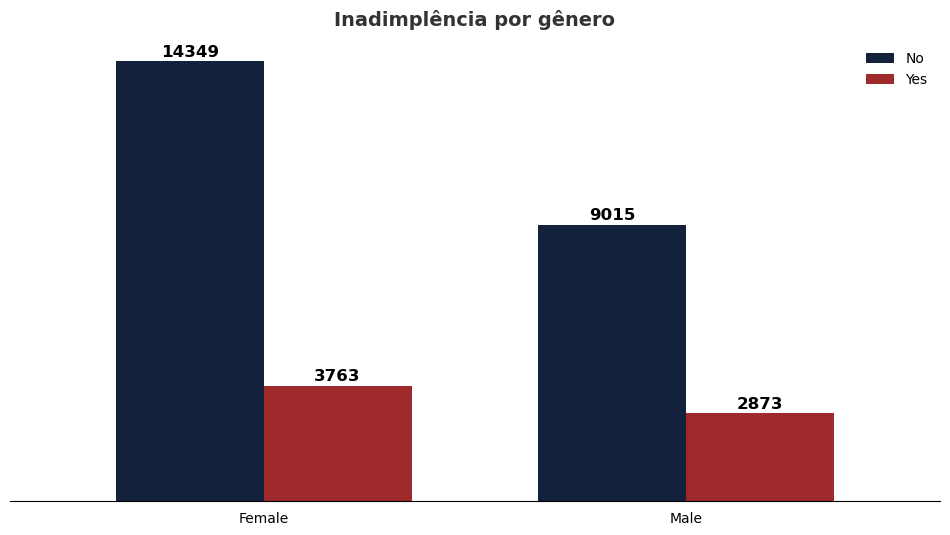

In [21]:
sex_crstab_plt = sex_crstab.plot(kind='bar', rot = 0, grid=False, width = 0.7, xlabel = '', color = ['#14213d', '#9e2a2b'],  figsize=(12, 6))
configure_bar_chart(sex_crstab_plt,'Inadimplência por gênero')

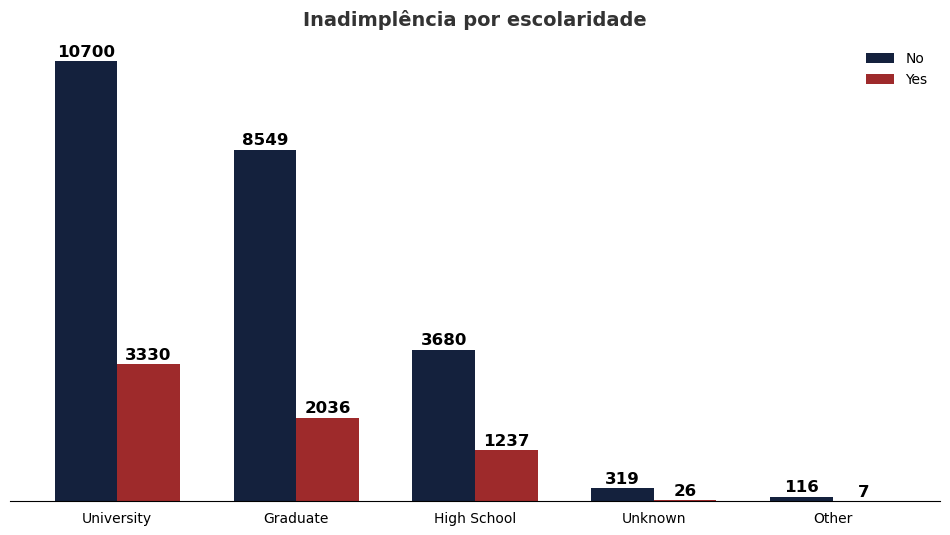

In [22]:
educ_crstab_plt = (educ_crstab.sort_values(['No'], ascending = False)
                              .plot(kind='bar', rot = 0, grid=False, width = 0.7, xlabel = '', color = ['#14213d', '#9e2a2b'], figsize=(12, 6)))
configure_bar_chart(educ_crstab_plt,'Inadimplência por escolaridade')


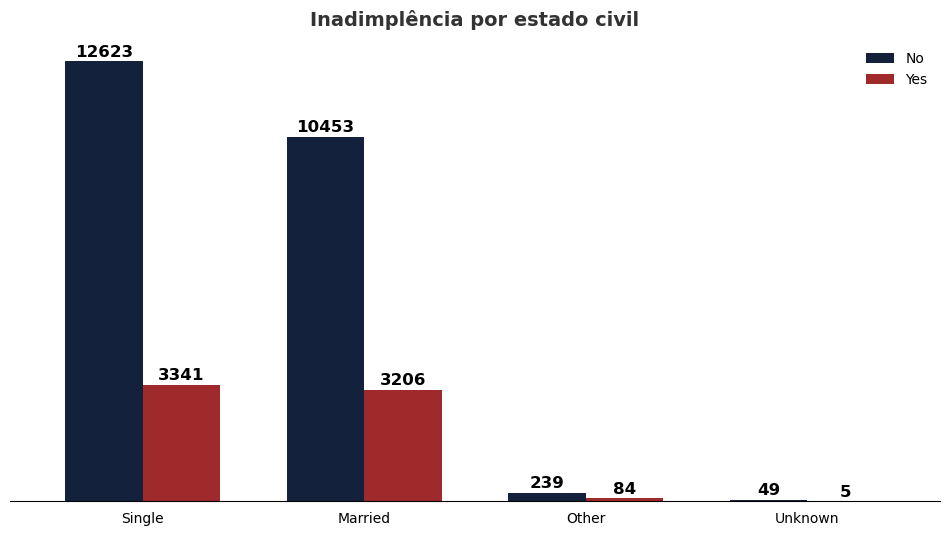

In [23]:
marriage_crstab_plt = (marriage_crstab.sort_values(['No'], ascending = False)
                              .plot(kind='bar', rot = 0, grid=False, width = 0.7, xlabel = '', color = ['#14213d', '#9e2a2b'], figsize=(12, 6)))
configure_bar_chart(marriage_crstab_plt,'Inadimplência por estado civil')

- Os genêros parecem ter níveis similares de inadimplência
- O estado civil também tem nívels similares de inadiplência (há um número de inadimplentes solteiros um pouco maior do que aqueles que são casados).

## Variáveis quantitativas

Vamos observar a distribuição das variáveis quantitativas.

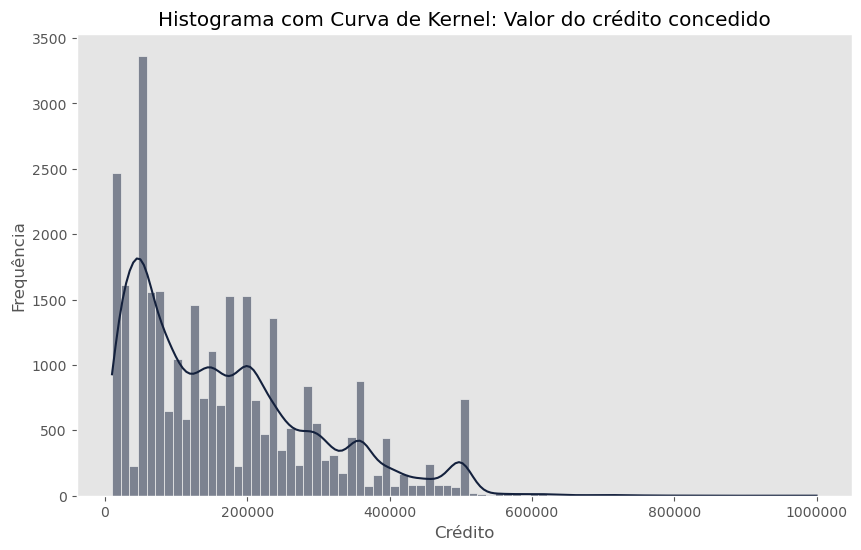

In [24]:
plot_histogram_kde(df['LIMIT_BAL'], 'Histograma com Curva de Kernel: Valor do crédito concedido', 'Crédito', 'Frequência', '#14213d')

A cauda longa sugere alguns outliers, fazendo um boxplot podemos confirmar isso:

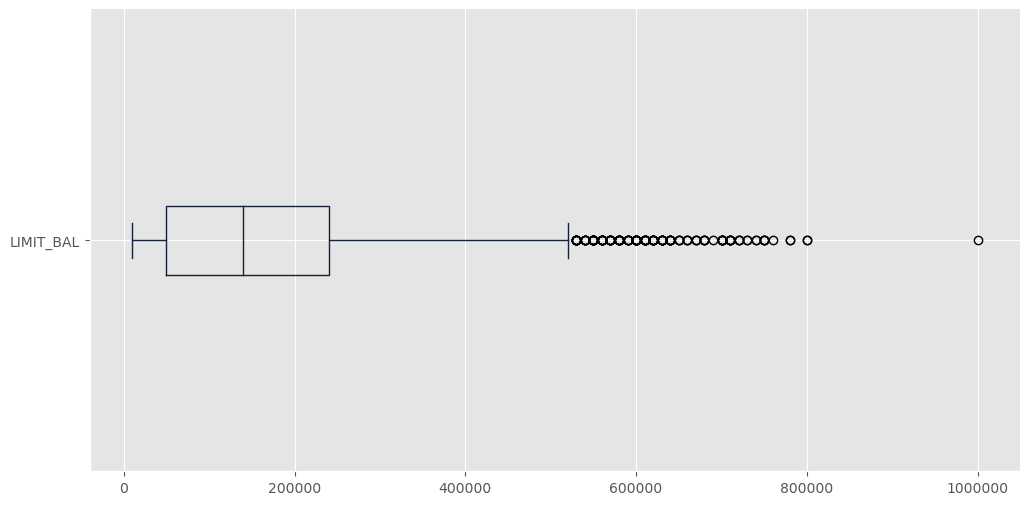

In [25]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    df.boxplot(column=['LIMIT_BAL'], vert=False, color='#14213d')
    ax.ticklabel_format(style='plain', axis='x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

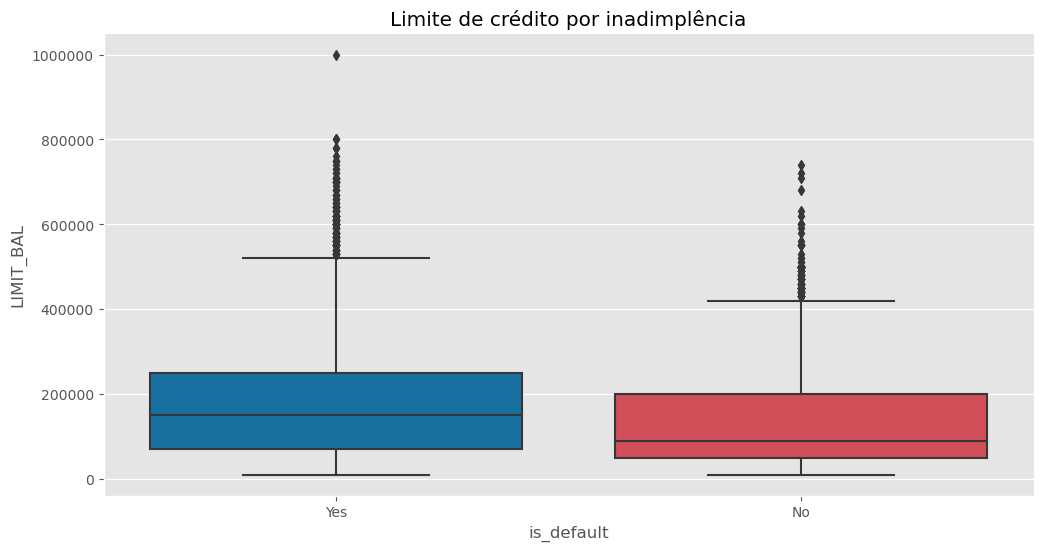

In [26]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='is_default', y='LIMIT_BAL', data=df, palette={0: '#0077b6', 1: '#e63946'})
    
    ax.ticklabel_format(style='plain', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title('Limite de crédito por inadimplência')
    # Substituir os rótulos do eixo x
    ax.set_xticklabels([label_mapping_default[label] for label in df['is_default'].unique()])

plt.show()

- Pessoas que estão inadimplentes tem maior limite de crédito, em média.

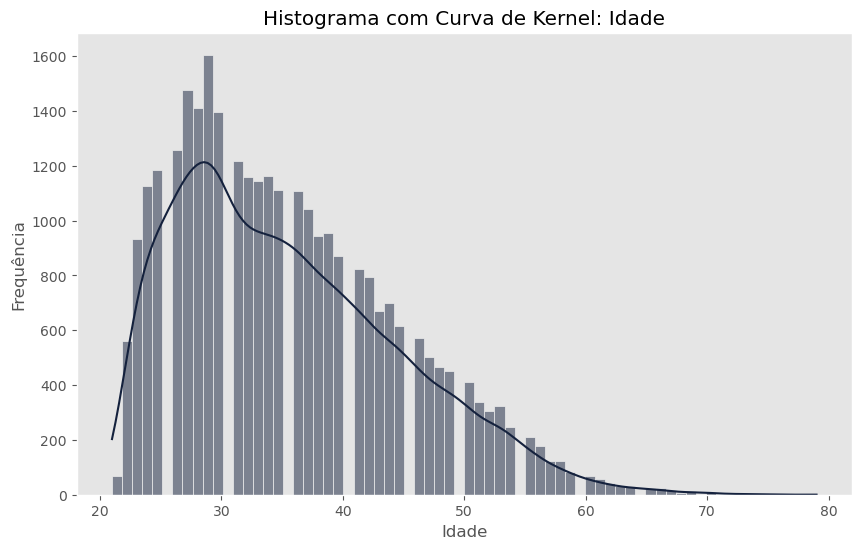

In [27]:
plot_histogram_kde(df['AGE'], 'Histograma com Curva de Kernel: Idade', 'Idade', 'Frequência', '#14213d')

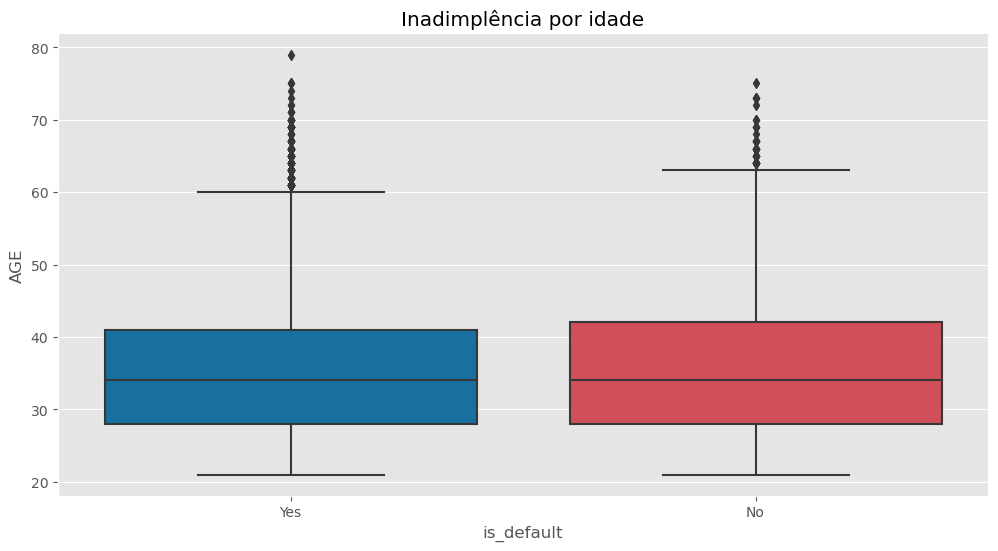

In [28]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='is_default', y='AGE', data=df, palette={0: '#0077b6', 1: '#e63946'})
    
    ax.ticklabel_format(style='plain', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title('Inadimplência por idade')
    # Substituir os rótulos do eixo x
    ax.set_xticklabels([label_mapping_default[label] for label in df['is_default'].unique()])

plt.show()


## Correlação

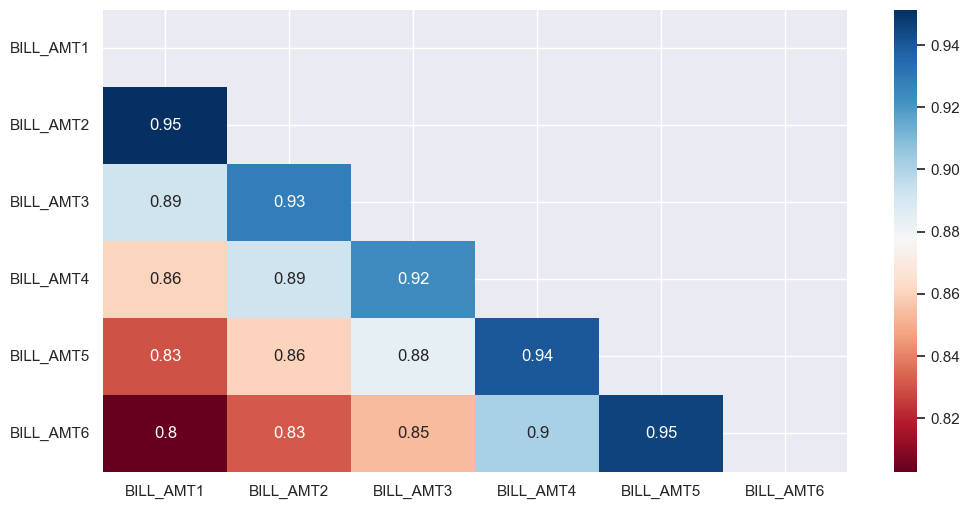

In [29]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
mask = np.triu(np.ones_like(df[var].corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df[var].corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

Acima temos a correlação entre o valor do extrato da fatura entre abril e setembro de 2005.
- Existe forte correlação positiva entre todas as variáveis de extrato da fatura (BILL_AMT1 a BILL_AMT6), com valores de correlação acima de 0.8. Assim, o valor do extrato da fatura em um mês está fortemente associado ao valor do extrato da fatura nos meses subsequentes.
- Quando o valor do extrato da fatura aumenta ou diminui em um mês, tende a aumentar ou diminuir nos meses seguintes.
A correlação entre as variáveis diminui ao longo do tempo, sugerindo que a relação linear entre elas está enfraquecendo com o passar dos meses. Esse padrão se repete para todas as variáveis.

Checamos, agora, o  estado de pagamento entre os meses:

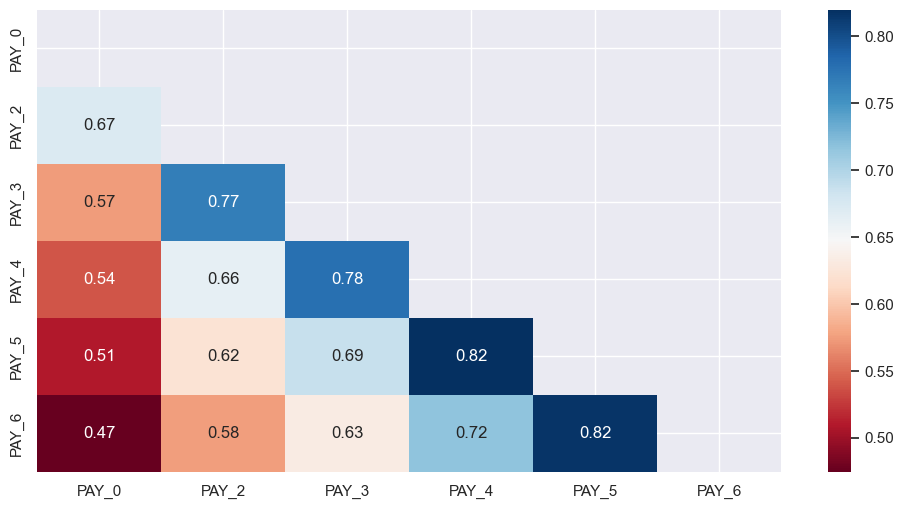

In [30]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
mask = np.triu(np.ones_like(df[var].corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df[var].corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

O padrão se repete, com a correlação diminuindo entre as variáveis conforme o passar do tempo.

Por fim, temos um gráfico de correlação entre valor do pagamento anterior:

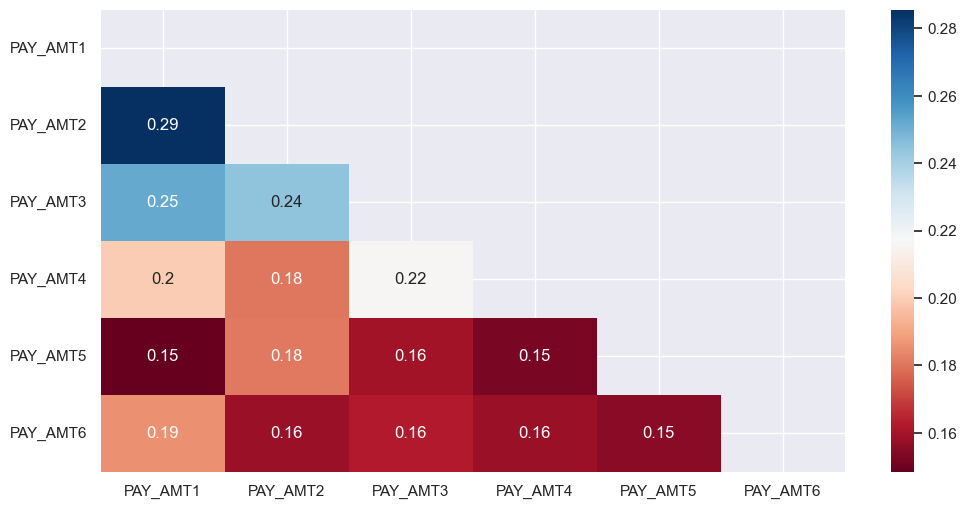

In [31]:
var = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
mask = np.triu(np.ones_like(df[var].corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df[var].corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

- Não há correlação entre o valor pago em um mês e o seguinte.



# Preparação dos dados

Nessa seção eu irei realizar algumas transformações nos dados para prosseguir com o modelo de classificação.

Como foi visto na análise exploratória de dados, ao analisar as distribuições de colunas individuais, temos alguns valores codificados em categorias que não existem no dicionário. Esses valores são valores faltantes em potencial, que estavam rotulados como 'Unknown'. Para lidar com dados ausentes, podemos optar por descartá-los, desenvolver um modelo de aprendizado de máquina para lidar com eles ou imputá-los com a moda no caso de dados categóricos. Descartar os dados não é aconselhável devido à perda de informações em nosso conjunto de dados já pequeno, e desenvolver um modelo de aprendizado de máquina está fora do escopo do projeto. Felizmente, existe uma categoria de "Other" para todas as variáveis categórias. É nessa categoria que iremos por os dados que não sabemos o verdadeiro rótulo.

Além de imputar o valores dos dados ausentes, também detectou-se na etapa anterior outliers. Irei eliminar os valores mais discrepantes do dataset. Feito isso, irei lidar com as variáveis categóricas, dividir o dataset entre treino e teste e normalizar os dados.

## Limpando outliers




In [32]:
df.shape

(30000, 25)

In [33]:
#outliers  de PAY_AMT
df = df[df['PAY_AMT1'] <= 750000]
df = df[df['PAY_AMT2'] <= 750000]
df = df[df['PAY_AMT3'] <= 750000]
df = df[df['PAY_AMT4'] <= 750000]
df = df[df['PAY_AMT5'] <= 750000]
df = df[df['PAY_AMT6'] <= 750000]

#outliers de LIMIT_BALL
df = df[df['LIMIT_BAL'] <= 750000]

#outliers
df = df[df['BILL_AMT1'] >= -150000]
df = df[df['BILL_AMT2'] >= -150000]
df = df[df['BILL_AMT3'] >= -150000]
df = df[df['BILL_AMT4'] >= -150000]
df = df[df['BILL_AMT5'] >= -150000]
df = df[df['BILL_AMT6'] >= -150000]

In [34]:
df.shape

(29983, 25)

## Recodificando variáveis

- `EDUCATION` é codificada como 1: 1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros, 5=desconhecido, 6=desconhecido. Renomearemos 5 e 6 como 4 (Outros).
- `MARRIAGE` é codificado como 1=casado, 2=solteiro, 3=outros, todo valor diferente desses três será classificado como 3 (Outros)

In [35]:
df['EDUCATION'] = df['EDUCATION'].replace([5, 6, 0], 4)
df['MARRIAGE'] = df['MARRIAGE'].replace([0], 3)

## Separando a variável target

In [36]:
y_all = df.loc[:, 'is_default']
X_all = df.drop('is_default', axis = 1)

In [37]:
print(len(X_all))
print(len(y_all))
print(y_all.value_counts(normalize=True))

29983
29983
0    0.778708
1    0.221292
Name: is_default, dtype: float64


## One Hot Encoding

In [38]:
'''
transformer = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop='first'), ['SEX', 'EDUCATION', 'MARRIAGE']),
    remainder= 'passthrough'
)
transformed = transformer.fit_transform(X_all)
'''

"\ntransformer = make_column_transformer(\n    (OneHotEncoder(sparse_output=False, drop='first'), ['SEX', 'EDUCATION', 'MARRIAGE']),\n    remainder= 'passthrough'\n)\ntransformed = transformer.fit_transform(X_all)\n"